##  Run Activity 1 

In [1]:
# import the libraries
import numpy as np
import pandas as pd

#Load the Data
patient_data=pd.read_csv("Health_Data.csv")

##use the head function to get a glimpse data
patient_data.head()

##Summary of Numerical Data
patient_data.describe()
    
##Summary of Categorical Data
patient_data.describe(include=['object'])

mydata=pd.read_csv("Health_Data.csv")
X=mydata.iloc[:,1:9]
y=mydata.iloc[:,9]


##New Admission type
A_type=pd.get_dummies(X.iloc[:,1],drop_first=True,prefix='Atype')

##New Gender 
New_gender=pd.get_dummies(X.iloc[:,4],drop_first=True,prefix='Gender')

##New Pre Existing Disease Variable
Pre_exdis=pd.get_dummies(X.iloc[:,2],drop_first=True,prefix='PreExistDis')

## Drop the original categorical columns
X.drop(['Admission_type','PreExistingDisease','Gender'],axis=1,inplace=True)

##Concat the new transformed data to X dataframe
X=pd.concat([X,A_type,New_gender,Pre_exdis],axis=1)

##Split The Data into Train and Test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X, y, test_size=0.30, random_state=110)

#Convert DataFrame to Numpy array

x_train=xtrain.values
x_test=xtest.values
y_train=ytrain.values
y_test=ytest.values

##Initialize StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

#Transform the training data
xtrain=sc.fit_transform(xtrain)
xtrain=pd.DataFrame(xtrain,columns=xtest.columns)

#Transform the testing data
xtest=sc.transform(xtest)
xtest=pd.DataFrame(xtest,columns=xtrain.columns)

##Import the relevant Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

##Initiate the Model with Sequential Class
model=Sequential()

## Add the 1st dense layer and Dropout Layer
model.add(Dense(units=6,activation='relu',kernel_initializer='uniform',input_dim=11))
model.add(Dropout(rate=0.3))

##Add the 2nd dense Layer and Dropout Layer
model.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(rate=0.3))

##Add Output Dense Layer
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))


#Compile the Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Fit the Model
model.fit(x_train,y_train,epochs=200,batch_size=20,)

#y_pred_class is the predcition & y_pred_prob is probabilities of the prediction

y_pred_class=model.predict(x_test)
y_pred_prob=model.predict_proba(x_test)

##Explore the y_pred_class
y_pred_class[:5]

##Set threshold all values above threshold are 1 and #below 0
y_pred_class=y_pred_class>0.5

#Calculate accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_class))

# Use the value_count function to calculate distinct class values
ytest.value_counts()

##use head function and divide it by lenght of ytest
print("Null Accuracy:",ytest.value_counts().head(1)/len(ytest))


C:\Users\Ritesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ritesh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Ritesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
249/249 [==============================] - 0s 1ms/step - loss: 0.6922 - acc: 0.6627
Epoch 2/200
249/249 [==============================] - 0s 52us/step - loss: 0.6882 - acc: 0.7912
Epoch 3/200
249/249 [==============================] - 0s 72us/step - loss: 0.6845 - acc: 0.7912
Epoch 4/200
249/249 [==============================] - 0s 64us/step - loss: 0.6802 - acc: 0.7912
Epoch 5/200
249/249 [==============================] - 0s 56us/step - loss: 0.6751 - acc: 0.7912
Epoch 6/200
249/249 [==============================] - 0s 60us/step - loss: 0.6683 - acc: 0.7912
Epoch 7/200
249/249 [==============================] - 0s 68us/step - loss: 0.6618 - acc: 0.7912
Epoch 8/200
249/249 [==============================] - 0s 52us/step - loss: 0.6516 - ac

249/249 [==============================] - 0s 60us/step - loss: 0.4770 - acc: 0.8233
Epoch 76/200
249/249 [==============================] - 0s 72us/step - loss: 0.4528 - acc: 0.8394
Epoch 77/200
249/249 [==============================] - 0s 56us/step - loss: 0.4463 - acc: 0.8434
Epoch 78/200
249/249 [==============================] - 0s 60us/step - loss: 0.4512 - acc: 0.8353
Epoch 79/200
249/249 [==============================] - 0s 72us/step - loss: 0.4533 - acc: 0.8474
Epoch 80/200
249/249 [==============================] - 0s 48us/step - loss: 0.4444 - acc: 0.8474
Epoch 81/200
249/249 [==============================] - 0s 52us/step - loss: 0.4666 - acc: 0.8233
Epoch 82/200
249/249 [==============================] - ETA: 0s - loss: 0.3517 - acc: 0.850 - 0s 56us/step - loss: 0.4620 - acc: 0.8233
Epoch 83/200
249/249 [==============================] - 0s 52us/step - loss: 0.4556 - acc: 0.8313
Epoch 84/200
249/249 [==============================] - 0s 56us/step - loss: 0.4137 - acc: 0.

249/249 [==============================] - 0s 72us/step - loss: 0.3520 - acc: 0.8635
Epoch 158/200
249/249 [==============================] - 0s 60us/step - loss: 0.4194 - acc: 0.8514
Epoch 159/200
249/249 [==============================] - 0s 56us/step - loss: 0.3911 - acc: 0.8514
Epoch 160/200
249/249 [==============================] - 0s 64us/step - loss: 0.4056 - acc: 0.8474
Epoch 161/200
249/249 [==============================] - 0s 68us/step - loss: 0.4233 - acc: 0.8313
Epoch 162/200
249/249 [==============================] - 0s 68us/step - loss: 0.4303 - acc: 0.8474
Epoch 163/200
249/249 [==============================] - 0s 72us/step - loss: 0.4290 - acc: 0.8353
Epoch 164/200
249/249 [==============================] - 0s 76us/step - loss: 0.4108 - acc: 0.8474
Epoch 165/200
249/249 [==============================] - 0s 80us/step - loss: 0.4712 - acc: 0.8153
Epoch 166/200
249/249 [==============================] - 0s 72us/step - loss: 0.4058 - acc: 0.8434
Epoch 167/200
249/249 [=

## Confusion Matrix & Derived Metrics

In [2]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_class)
print(cm)


[[91  0]
 [14  3]]


In [3]:
##True Negative
TN=cm[0,0]
##False Negative
FN=cm[1,0]
##False Positives
FP=cm[0,1]
##True Positives
TP=cm[1,1]


In [4]:
## Calculating Sensitivity
Sensitivity=TP/(TP+FN)
Sensitivity


0.17647058823529413

In [5]:
##Calculating Specificity
Specificity=TN/(TN+FP)
Specificity


1.0

In [6]:
##Precision
Precision= TP/(TP+FP)
Precision


1.0

In [7]:
##Calculate False Positive_rate
False_Positive_rate= FP/(FP+TN)
False_Positive_rate


0.0

In [8]:
y_pred_class=y_pred_class>0.3

In [9]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_class)
cm


array([[91,  0],
       [14,  3]], dtype=int64)

In [10]:
##True Negative
TN=cm[0,0]
##False Negative
FN=cm[1,0]
##False Positives
FP=cm[0,1]
##True Positives
TP=cm[1,1]


In [11]:
## Calculating Sensitivity
Sensitivity=TP/(TP+FN)
Sensitivity


0.17647058823529413

In [12]:
##Calculating Specificity
Specificity=TN/(TN+FP)
Specificity


1.0

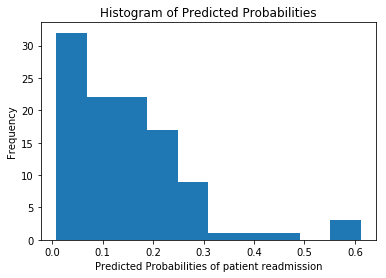

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
#histogram of class distribution
plt.hist(y_pred_prob)
plt.title("Histogram of Predicted Probabilities")
plt.xlabel("Predicted Probabilities of patient readmission")
plt.ylabel("Frequency")
plt.show()
